<a href="https://colab.research.google.com/github/NIP-Data-Computation/show-and-tell/blob/master/calistaf_show_and_tell_week6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Using the education data set

#Basic package and file imports

Here I imported the packages I used

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import csv, sqlite3

Here I mounted my google drive to access the data set

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Check what's mounted 

In [ ]:
!ls

drive  sample_data


Here I mounted my data set

In [ ]:
educ_path = '/content/drive/My Drive/UP Diliman/Data and Computation/Datasets/Philippines-Education/education_phl.csv'

Check if the data set was mounted

In [ ]:
check = pd.read_csv(educ_path)
print(check)

        Country Name   Country ISO3  ...        Indicator Code                 Value
0      #country+name  #country+code  ...       #indicator+code  #indicator+value+num
1        Philippines            PHL  ...   BAR.NOED.1519.FE.ZS                  0.92
2        Philippines            PHL  ...   BAR.NOED.1519.FE.ZS                  2.42
3        Philippines            PHL  ...   BAR.NOED.1519.FE.ZS                  3.66
4        Philippines            PHL  ...   BAR.NOED.1519.FE.ZS                  2.83
...              ...            ...  ...                   ...                   ...
17744    Philippines            PHL  ...     SP.POP.1564.TO.ZS      49.4176690320162
17745    Philippines            PHL  ...     SP.POP.1564.TO.ZS      49.6062465178769
17746    Philippines            PHL  ...     SP.POP.1564.TO.ZS      49.7963903968798
17747    Philippines            PHL  ...     SP.POP.1564.TO.ZS      49.8840490733557
17748    Philippines            PHL  ...  SE.TER.GRAD.FE.SI.ZS   

#SQL set up

Here I created the engine to be able to access the tables in the sql database.

In [ ]:
#sqlalchemy
from sqlalchemy import create_engine
engine = create_engine('sqlite:///')
connection = engine.connect()

Here I made the dataframe from the csv file and cleaned it by removing unnecessary columns, cleaning the text in the indicator columns, replacing the column names (to query them more easily) and made the value column numeric. 

In [ ]:
#sqlalchemy

educdf = pd.read_csv(educ_path)
#cleaning the data set, choosing columns to use, renaming columns for ease with querying
educationdf = educdf.drop(columns=['Country Name','Country ISO3'], index =0).rename(columns={'Year':'year', 'Indicator Name':'indicator', 'Indicator Code':'code', 'Value':'value' })
#cleaning the indicator column to remove unnecessary text
educationdf['indicator'] = educationdf['indicator'].str.replace('Barro-Lee: ','')
educationdf['value'] = pd.to_numeric(educationdf['value'])
educationdf

,year,indicator,code,value
1,2010,Percentage of female population age 15-19 with...,BAR.NOED.1519.FE.ZS,0.920000
2,2005,Percentage of female population age 15-19 with...,BAR.NOED.1519.FE.ZS,2.420000
3,2000,Percentage of female population age 15-19 with...,BAR.NOED.1519.FE.ZS,3.660000
4,1995,Percentage of female population age 15-19 with...,BAR.NOED.1519.FE.ZS,2.830000
5,1990,Percentage of female population age 15-19 with...,BAR.NOED.1519.FE.ZS,2.200000
...,...,...,...,...
17744,1963,Population ages 15-64 (% of total population),SP.POP.1564.TO.ZS,49.417669
17745,1962,Population ages 15-64 (% of total population),SP.POP.1564.TO.ZS,49.606247
17746,1961,Population ages 15-64 (% of total population),SP.POP.1564.TO.ZS,49.796390
17747,1960,Population ages 15-64 (% of total population),SP.POP.1564.TO.ZS,49.884049


Here I created the SQL table to be able to pass queries

In [ ]:
#sqlalchemy
educationdf.to_sql('education_t', con = engine, if_exists='append', index=False)

#Distinct Indicators

See all the distinct indicators I can look into (using SQL)

In [ ]:
#Look at all the indicators I can play around with
engine.execute("SELECT DISTINCT indicator FROM education_t").fetchall()

[('Percentage of female population age 15-19 with no education',),
 ('Percentage of population age 15-19 with no education',),
 ('Percentage of female population age 15+ with no education',),
 ('Percentage of population age 15+ with no education',),
 ('Percentage of female population age 20-24 with no education',),
 ('Percentage of population age 20-24 with no education',),
 ('Percentage of female population age 25-29 with no education',),
 ('Percentage of population age 25-29 with no education',),
 ('Percentage of female population age 25+ with no education',),
 ('Percentage of population age 25+ with no education',),
 ('Percentage of female population age 30-34 with no education',),
 ('Percentage of population age 30-34 with no education',),
 ('Percentage of female population age 35-39 with no education',),
 ('Percentage of population age 35-39 with no education',),
 ('Percentage of female population age 40-44 with no education',),
 ('Percentage of population age 40-44 with no educat

# Population data

Here I looked at the population data by getting anything that followed a certain format

In [ ]:
#Look at the population data
engine.execute("SELECT indicator, year, value FROM education_t WHERE indicator LIKE 'Population in thousands%-%total' ORDER BY year").fetchall()

[('Population in thousands, age 15-19, total', '1970', 4065.0),
 ('Population in thousands, age 20-24, total', '1970', 3127.0),
 ('Population in thousands, age 25-29, total', '1970', 2611.0),
 ('Population in thousands, age 30-34, total', '1970', 2149.0),
 ('Population in thousands, age 35-39, total', '1970', 1795.0),
 ('Population in thousands, age 40-44, total', '1970', 1361.0),
 ('Population in thousands, age 45-49, total', '1970', 1215.0),
 ('Population in thousands, age 50-54, total', '1970', 1007.0),
 ('Population in thousands, age 55-59, total', '1970', 884.0),
 ('Population in thousands, age 60-64, total', '1970', 704.0),
 ('Population in thousands, age 15-19, total', '1975', 4685.0),
 ('Population in thousands, age 20-24, total', '1975', 3968.0),
 ('Population in thousands, age 25-29, total', '1975', 3026.0),
 ('Population in thousands, age 30-34, total', '1975', 2521.0),
 ('Population in thousands, age 35-39, total', '1975', 2070.0),
 ('Population in thousands, age 40-44, tot

**Let's look at the data from the year extremes and midpoint: 1970, 1990 and 2010.**

Here I put the data from 1970, 1990, and 2010 into a dataframe

In [ ]:
age_list = ['15-19', '20-24', '25-29','30-34','35-39','40-44','45-49','50-54','55-59','60-64']

In [ ]:
pop_1970_q = "SELECT indicator, year, value FROM education_t WHERE indicator LIKE 'Population in thousands%-%total' AND year IS '1970' ORDER BY year"
pop_1970_df = pd.read_sql(pop_1970_q, con= engine)
pop_1970_df['age'] = age_list
pop_1970_df

,indicator,year,value,age
0,"Population in thousands, age 15-19, total",1970,4065.0,15-19
1,"Population in thousands, age 20-24, total",1970,3127.0,20-24
2,"Population in thousands, age 25-29, total",1970,2611.0,25-29
3,"Population in thousands, age 30-34, total",1970,2149.0,30-34
4,"Population in thousands, age 35-39, total",1970,1795.0,35-39
5,"Population in thousands, age 40-44, total",1970,1361.0,40-44
6,"Population in thousands, age 45-49, total",1970,1215.0,45-49
7,"Population in thousands, age 50-54, total",1970,1007.0,50-54
8,"Population in thousands, age 55-59, total",1970,884.0,55-59
9,"Population in thousands, age 60-64, total",1970,704.0,60-64


In [ ]:
pop_1990_q = "SELECT indicator, year, value FROM education_t WHERE indicator LIKE 'Population in thousands%-%total' AND year IS '1990' ORDER BY year"
pop_1990_df = pd.read_sql(pop_1990_q, con= engine)
pop_1990_df['age'] = age_list
pop_1990_df

,indicator,year,value,age
0,"Population in thousands, age 15-19, total",1990,6661.0,15-19
1,"Population in thousands, age 20-24, total",1990,5809.0,20-24
2,"Population in thousands, age 25-29, total",1990,4940.0,25-29
3,"Population in thousands, age 30-34, total",1990,4154.0,30-34
4,"Population in thousands, age 35-39, total",1990,3487.0,35-39
5,"Population in thousands, age 40-44, total",1990,2641.0,40-44
6,"Population in thousands, age 45-49, total",1990,2196.0,45-49
7,"Population in thousands, age 50-54, total",1990,1779.0,50-54
8,"Population in thousands, age 55-59, total",1990,1436.0,55-59
9,"Population in thousands, age 60-64, total",1990,1019.0,60-64


In [ ]:
pop_2010_q = "SELECT indicator, year, value FROM education_t WHERE indicator LIKE 'Population in thousands%-%total' AND year IS '2010' ORDER BY year"
pop_2010_df = pd.read_sql(pop_2010_q, con= engine)
pop_2010_df['age'] = age_list
pop_2010_df

,indicator,year,value,age
0,"Population in thousands, age 15-19, total",2010,9486.0,15-19
1,"Population in thousands, age 20-24, total",2010,8709.0,20-24
2,"Population in thousands, age 25-29, total",2010,7739.0,25-29
3,"Population in thousands, age 30-34, total",2010,6889.0,30-34
4,"Population in thousands, age 35-39, total",2010,5909.0,35-39
5,"Population in thousands, age 40-44, total",2010,5113.0,40-44
6,"Population in thousands, age 45-49, total",2010,4344.0,45-49
7,"Population in thousands, age 50-54, total",2010,3626.0,50-54
8,"Population in thousands, age 55-59, total",2010,2973.0,55-59
9,"Population in thousands, age 60-64, total",2010,2132.0,60-64


In [ ]:
pop_1970f_q = "SELECT indicator, year, value FROM education_t WHERE indicator LIKE 'Population in thousands%-%female' AND year IS '1970' ORDER BY year"
pop_1970f_df = pd.read_sql(pop_1970f_q, con= engine)
pop_1970f_df['age'] = age_list
pop_1970f_df

,indicator,year,value,age
0,"Population in thousands, age 15-19, female",1970,2006.0,15-19
1,"Population in thousands, age 20-24, female",1970,1512.0,20-24
2,"Population in thousands, age 25-29, female",1970,1275.0,25-29
3,"Population in thousands, age 30-34, female",1970,1063.0,30-34
4,"Population in thousands, age 35-39, female",1970,878.0,35-39
5,"Population in thousands, age 40-44, female",1970,694.0,40-44
6,"Population in thousands, age 45-49, female",1970,639.0,45-49
7,"Population in thousands, age 50-54, female",1970,530.0,50-54
8,"Population in thousands, age 55-59, female",1970,464.0,55-59
9,"Population in thousands, age 60-64, female",1970,361.0,60-64


In [ ]:
pop_1990f_q = "SELECT indicator, year, value FROM education_t WHERE indicator LIKE 'Population in thousands%-%female' AND year IS '1990' ORDER BY year"
pop_1990f_df = pd.read_sql(pop_1990f_q, con= engine)
pop_1990f_df['age'] = age_list
pop_1990f_df

,indicator,year,value,age
0,"Population in thousands, age 15-19, female",1990,3269.0,15-19
1,"Population in thousands, age 20-24, female",1990,2863.0,20-24
2,"Population in thousands, age 25-29, female",1990,2447.0,25-29
3,"Population in thousands, age 30-34, female",1990,2068.0,30-34
4,"Population in thousands, age 35-39, female",1990,1745.0,35-39
5,"Population in thousands, age 40-44, female",1990,1296.0,40-44
6,"Population in thousands, age 45-49, female",1990,1092.0,45-49
7,"Population in thousands, age 50-54, female",1990,902.0,50-54
8,"Population in thousands, age 55-59, female",1990,727.0,55-59
9,"Population in thousands, age 60-64, female",1990,545.0,60-64


In [ ]:
pop_2010f_q = "SELECT indicator, year, value FROM education_t WHERE indicator LIKE 'Population in thousands%-%female' AND year IS '2010' ORDER BY year"
pop_2010f_df = pd.read_sql(pop_2010f_q, con= engine)
pop_2010f_df['age'] = age_list
pop_2010f_df

,indicator,year,value,age
0,"Population in thousands, age 15-19, female",2010,4649.0,15-19
1,"Population in thousands, age 20-24, female",2010,4282.0,20-24
2,"Population in thousands, age 25-29, female",2010,3822.0,25-29
3,"Population in thousands, age 30-34, female",2010,3413.0,30-34
4,"Population in thousands, age 35-39, female",2010,2939.0,35-39
5,"Population in thousands, age 40-44, female",2010,2557.0,40-44
6,"Population in thousands, age 45-49, female",2010,2187.0,45-49
7,"Population in thousands, age 50-54, female",2010,1841.0,50-54
8,"Population in thousands, age 55-59, female",2010,1529.0,55-59
9,"Population in thousands, age 60-64, female",2010,1090.0,60-64


Here I showed the population data for each age group in the 3 years chosen.

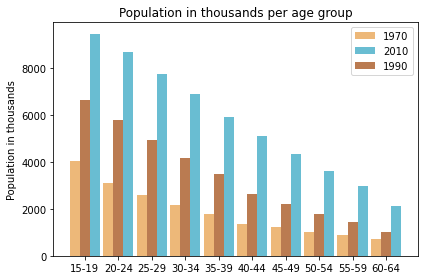

In [ ]:
x = np.arange(len(age_list))  # the label locations
width = 0.3  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, pop_1970_df['value'], width, label='1970', color = '#edb879')
rects2 = ax.bar(x + width, pop_2010_df['value'], width, label='2010', color ='#69bdd2')
rects3 = ax.bar(x, pop_1990_df['value'], width, label='1990', color ='#ba7b51')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Population in thousands')
ax.set_title('Population in thousands per age group')
ax.set_xticks(x)
ax.set_xticklabels(age_list)
ax.legend()
fig.tight_layout()

plt.show()

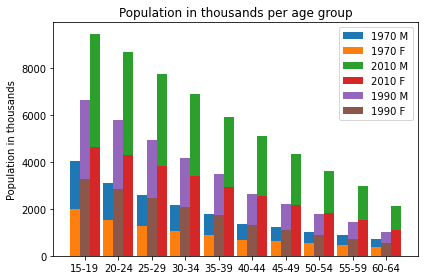

In [ ]:
x = np.arange(len(age_list))  # the label locations
width = 0.3  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, pop_1970_df['value'], width, label='1970 M')
rects2 = ax.bar(x- width, pop_1970f_df['value'], width, label='1970 F')
rects2 = ax.bar(x + width, pop_2010_df['value'], width, label='2010 M')
rects3 = ax.bar(x + width, pop_2010f_df['value'], width, label='2010 F')
rects3 = ax.bar(x, pop_1990_df['value'], width, label='1990 M')
rects2 = ax.bar(x, pop_1990f_df['value'], width, label='1990 F')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Population in thousands')
ax.set_title('Population in thousands per age group')
ax.set_xticks(x)
ax.set_xticklabels(age_list)
ax.legend()
fig.tight_layout()

plt.show()

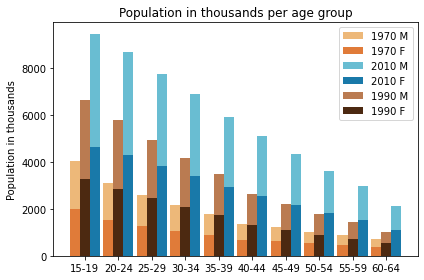

In [ ]:
x = np.arange(len(age_list))  # the label locations
width = 0.3  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, pop_1970_df['value'], width, label='1970 M', color = '#edb879')
rects2 = ax.bar(x- width, pop_1970f_df['value'], width, label='1970 F', color = '#e07b39')
rects2 = ax.bar(x + width, pop_2010_df['value'], width, label='2010 M', color ='#69bdd2')
rects3 = ax.bar(x + width, pop_2010f_df['value'], width, label='2010 F', color ='#1979a9')
rects3 = ax.bar(x, pop_1990_df['value'], width, label='1990 M', color ='#ba7b51')
rects2 = ax.bar(x, pop_1990f_df['value'], width, label='1990 F', color='#4c2911')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Population in thousands')
ax.set_title('Population in thousands per age group')
ax.set_xticks(x)
ax.set_xticklabels(age_list)
ax.legend()
fig.tight_layout()

plt.show()

#Unemployment data

Here I checked the indicators available relating to unemployment

In [ ]:
engine.execute("SELECT indicator, year, value FROM education_t WHERE indicator LIKE 'Unemployment, total%' ORDER BY year").fetchall()

[('Unemployment, total (% of total labor force) (modeled ILO estimate)', '1991', 3.5329999923706095),
 ('Unemployment, total (% of total labor force) (modeled ILO estimate)', '1992', 3.57399988174438),
 ('Unemployment, total (% of total labor force) (modeled ILO estimate)', '1993', 3.65400004386902),
 ('Unemployment, total (% of total labor force) (modeled ILO estimate)', '1994', 3.67000007629395),
 ('Unemployment, total (% of total labor force) (modeled ILO estimate)', '1995', 3.67400002479553),
 ('Unemployment, total (% of total labor force) (modeled ILO estimate)', '1996', 3.68700003623962),
 ('Unemployment, total (% of total labor force) (modeled ILO estimate)', '1997', 3.6770000457763703),
 ('Unemployment, total (% of total labor force) (modeled ILO estimate)', '1998', 3.67400002479553),
 ('Unemployment, total (% of total labor force) (modeled ILO estimate)', '1999', 3.71499991416931),
 ('Unemployment, total (% of total labor force) (modeled ILO estimate)', '2000', 3.7000000476837

Here I created the dataframe for unemployment rate for each year

In [ ]:
unemployment_q = "SELECT indicator, year, value FROM education_t WHERE indicator LIKE 'Unemployment, total%' ORDER BY year"
unemployment_df = pd.read_sql(unemployment_q, con= engine)
unemployment_df.head()

,indicator,year,value
0,"Unemployment, total (% of total labor force) (...",1991,3.533
1,"Unemployment, total (% of total labor force) (...",1992,3.574
2,"Unemployment, total (% of total labor force) (...",1993,3.654
3,"Unemployment, total (% of total labor force) (...",1994,3.670
4,"Unemployment, total (% of total labor force) (...",1995,3.674


<function matplotlib.pyplot.show>

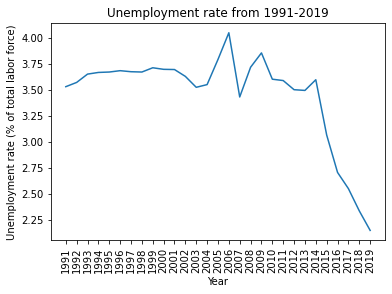

In [ ]:
fig, ax = plt.subplots()

ax.plot(unemployment_df['year'], unemployment_df['value'])
#ax.annotate('text explaining the data', xy = (2006, 1),
#	xytext = (2006, -0.2), arrowprops = {'arrowstyle' : '->',
#	'color' : 'gray'})

plt.xticks(rotation=90)
plt.xlabel('Year')
plt.ylabel('Unemployment rate (% of total labor force)')
plt.title('Unemployment rate from 1991-2019')

plt.show

#Grade 1 entrants

Here I looked at all the entries related to new grade 1 entrants.

In [ ]:
engine.execute("SELECT indicator, year, value FROM education_t WHERE indicator LIKE 'New entrants to Grade 1 of primary education, both sexes (number)%' ORDER BY year").fetchmany(100)
#

[('New entrants to Grade 1 of primary education, both sexes (number)', '1981', 1749850.0),
 ('New entrants to Grade 1 of primary education, both sexes (number)', '1983', 1773281.0),
 ('New entrants to Grade 1 of primary education, both sexes (number)', '1984', 1831651.0),
 ('New entrants to Grade 1 of primary education, both sexes (number)', '1985', 1874181.0),
 ('New entrants to Grade 1 of primary education, both sexes (number)', '1986', 1920098.0),
 ('New entrants to Grade 1 of primary education, both sexes (number)', '1987', 1892179.0),
 ('New entrants to Grade 1 of primary education, both sexes (number)', '1988', 2107326.0),
 ('New entrants to Grade 1 of primary education, both sexes (number)', '1989', 2156873.0),
 ('New entrants to Grade 1 of primary education, both sexes (number)', '1990', 2151304.0),
 ('New entrants to Grade 1 of primary education, both sexes (number)', '1992', 2138081.0),
 ('New entrants to Grade 1 of primary education, both sexes (number)', '1993', 2144484.0),

Here I looked at all the entries regarding population of entrants to grade 1

In [ ]:
engine.execute("SELECT indicator, year, value/1000 FROM education_t WHERE indicator IS 'Population of the official entrance age to primary education, both sexes (number)' ORDER BY year").fetchall()

[('Population of the official entrance age to primary education, both sexes (number)', '1970', 1098.566),
 ('Population of the official entrance age to primary education, both sexes (number)', '1971', 1094.883),
 ('Population of the official entrance age to primary education, both sexes (number)', '1972', 1120.628),
 ('Population of the official entrance age to primary education, both sexes (number)', '1973', 1145.401),
 ('Population of the official entrance age to primary education, both sexes (number)', '1974', 1169.342),
 ('Population of the official entrance age to primary education, both sexes (number)', '1975', 1220.172),
 ('Population of the official entrance age to primary education, both sexes (number)', '1976', 1215.318),
 ('Population of the official entrance age to primary education, both sexes (number)', '1977', 1241.058),
 ('Population of the official entrance age to primary education, both sexes (number)', '1978', 1266.477),
 ('Population of the official entrance age to 

In [ ]:
grade1_q = "SELECT indicator, year, value/1000 FROM education_t WHERE indicator LIKE 'New entrants to Grade 1 of primary education, both sexes (number)%' ORDER BY year"
grade1_df = pd.read_sql(grade1_q, con= engine)
listg1 = grade1_df['year'].to_list()
grade1_df

,indicator,year,value/1000
0,"New entrants to Grade 1 of primary education, ...",1981,1749.850
1,"New entrants to Grade 1 of primary education, ...",1983,1773.281
2,"New entrants to Grade 1 of primary education, ...",1984,1831.651
3,"New entrants to Grade 1 of primary education, ...",1985,1874.181
4,"New entrants to Grade 1 of primary education, ...",1986,1920.098
5,"New entrants to Grade 1 of primary education, ...",1987,1892.179
6,"New entrants to Grade 1 of primary education, ...",1988,2107.326
7,"New entrants to Grade 1 of primary education, ...",1989,2156.873
8,"New entrants to Grade 1 of primary education, ...",1990,2151.304
9,"New entrants to Grade 1 of primary education, ...",1992,2138.081


In [ ]:
grade1pop_q = "SELECT indicator, year, value/1000 FROM education_t WHERE indicator IS 'Population of the official entrance age to primary education, both sexes (number)' ORDER BY year"
grade1pop_df = pd.read_sql(grade1pop_q, con= engine)
grade1pop_df

,indicator,year,value/1000
0,Population of the official entrance age to pri...,1970,1098.566
1,Population of the official entrance age to pri...,1971,1094.883
2,Population of the official entrance age to pri...,1972,1120.628
3,Population of the official entrance age to pri...,1973,1145.401
4,Population of the official entrance age to pri...,1974,1169.342
5,Population of the official entrance age to pri...,1975,1220.172
6,Population of the official entrance age to pri...,1976,1215.318
7,Population of the official entrance age to pri...,1977,1241.058
8,Population of the official entrance age to pri...,1978,1266.477
9,Population of the official entrance age to pri...,1979,1291.954


In [ ]:
grade1pop_df[grade1pop_df['year'].isin(listg1)]['value/1000']

11    1344.256
13    1406.210
14    1440.768
15    1475.656
16    1509.385
17    1545.251
18    1579.415
19    1612.466
20    1682.556
22    1714.371
23    1754.213
25    1835.030
27    1937.267
28    1960.807
29    1980.262
31    2018.306
32    2045.448
33    2074.929
34    2104.970
35    2134.045
36    2160.689
37    2168.357
38    2168.245
39    2161.072
44    2171.314
45    2189.612
46    2207.061
47    2226.802
Name: value/1000, dtype: float64

Here, I plotted the new grade 1 entrants in relation to the school age population. The outcome was strange.

<function matplotlib.pyplot.show>

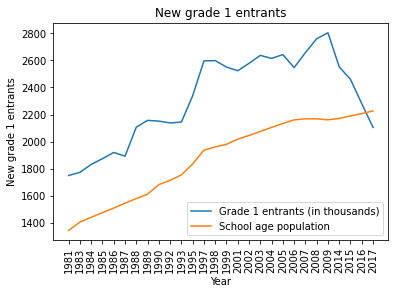

In [ ]:
fig, ax = plt.subplots()

ax.plot(grade1_df['year'], grade1_df['value/1000'], label = 'Grade 1 entrants (in thousands)')
ax.plot(grade1_df['year'], grade1pop_df[grade1pop_df['year'].isin(listg1)]['value/1000'], label = 'School age population')

plt.xticks(rotation=90)
plt.xlabel('Year')
plt.ylabel('New grade 1 entrants')
plt.title('New grade 1 entrants')

plt.legend()
plt.show

#Drop-outs

Here I got the entries for drop-out rates per grade level for each year

In [ ]:
engine.execute("SELECT indicator, year, value FROM education_t WHERE indicator LIKE 'Drop-out rate from Grade 1%both sexes%' ORDER BY year").fetchmany(100)
#

[('Drop-out rate from Grade 1 of primary education, both sexes (%)', '1980', 15.10796),
 ('Drop-out rate from Grade 1 of primary education, both sexes (%)', '1982', 13.44439),
 ('Drop-out rate from Grade 1 of primary education, both sexes (%)', '1983', 13.376829999999998),
 ('Drop-out rate from Grade 1 of primary education, both sexes (%)', '1984', 13.06975),
 ('Drop-out rate from Grade 1 of primary education, both sexes (%)', '1985', 12.99059),
 ('Drop-out rate from Grade 1 of primary education, both sexes (%)', '1986', 11.588289999999999),
 ('Drop-out rate from Grade 1 of primary education, both sexes (%)', '1987', 6.7626100000000005),
 ('Drop-out rate from Grade 1 of primary education, both sexes (%)', '1988', 12.6087),
 ('Drop-out rate from Grade 1 of primary education, both sexes (%)', '1989', 12.40216),
 ('Drop-out rate from Grade 1 of primary education, both sexes (%)', '1997', 14.79907),
 ('Drop-out rate from Grade 1 of primary education, both sexes (%)', '1998', 14.95456),
 ('

Here I made the dataframe for grade 1 drop-outs for 1982 onwards (because other grade levels don't have data for years before that)

In [ ]:
dograde1_q = "SELECT indicator, year, value FROM education_t WHERE indicator LIKE 'Drop-out rate from Grade 1%both sexes%' AND (year>1981) ORDER BY year"
dograde1_df = pd.read_sql(dograde1_q, con= engine)
dograde1_df

,indicator,year,value
0,Drop-out rate from Grade 1 of primary educatio...,1982,13.44439
1,Drop-out rate from Grade 1 of primary educatio...,1983,13.37683
2,Drop-out rate from Grade 1 of primary educatio...,1984,13.06975
3,Drop-out rate from Grade 1 of primary educatio...,1985,12.99059
4,Drop-out rate from Grade 1 of primary educatio...,1986,11.58829
5,Drop-out rate from Grade 1 of primary educatio...,1987,6.76261
6,Drop-out rate from Grade 1 of primary educatio...,1988,12.60870
7,Drop-out rate from Grade 1 of primary educatio...,1989,12.40216
8,Drop-out rate from Grade 1 of primary educatio...,1997,14.79907
9,Drop-out rate from Grade 1 of primary educatio...,1998,14.95456


In [ ]:
dograde2_q = "SELECT indicator, year, value FROM education_t WHERE indicator LIKE 'Drop-out rate from Grade 2%both sexes%' AND (year>1981) ORDER BY year"
dograde2_df = pd.read_sql(dograde2_q, con= engine)
dograde3_q = "SELECT indicator, year, value FROM education_t WHERE indicator LIKE 'Drop-out rate from Grade 3%both sexes%' AND (year>1981) ORDER BY year"
dograde3_df = pd.read_sql(dograde3_q, con= engine)
dograde4_q = "SELECT indicator, year, value FROM education_t WHERE indicator LIKE 'Drop-out rate from Grade 4%both sexes%' AND (year>1981) ORDER BY year"
dograde4_df = pd.read_sql(dograde4_q, con= engine)
dograde5_q = "SELECT indicator, year, value FROM education_t WHERE indicator LIKE 'Drop-out rate from Grade 5%both sexes%' AND (year>1981) ORDER BY year"
dograde5_df = pd.read_sql(dograde5_q, con= engine)

<function matplotlib.pyplot.show>

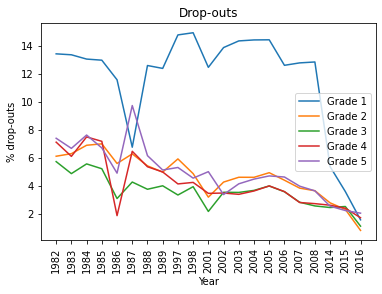

In [ ]:
fig, ax = plt.subplots()

pt1 = ax.plot(dograde1_df['year'], dograde1_df['value'], label = 'Grade 1')
pt2 = ax.plot(dograde1_df['year'], dograde2_df['value'], label = 'Grade 2')
pt3 = ax.plot(dograde1_df['year'], dograde3_df['value'], label = 'Grade 3')
pt4 = ax.plot(dograde1_df['year'], dograde4_df['value'], label = 'Grade 4')
pt5 = ax.plot(dograde1_df['year'], dograde5_df['value'], label = 'Grade 5')

plt.xticks(rotation=90)
plt.xlabel('Year')
plt.ylabel('% drop-outs')
plt.title('Drop-outs')

plt.legend()
plt.show